In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
import matplotlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import SVG
import keras.backend as K
from keras.layers import Input, Dense, LSTM, GRU, Embedding, Lambda
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import model_to_dot
from tqdm import tqdm,trange

Using TensorFlow backend.


# Set parameters

In [2]:
num_train_examples = 100000
max_train_length = 10

num_test_examples = 10000
min_test_length=5
max_test_length=100
step_test_length=5

# Generate train data

In [3]:
X = np.zeros((num_train_examples,max_train_length))
sum_X = np.zeros((num_train_examples))
for i in tqdm(range(num_train_examples), desc='Generating train examples: '):
    n = np.random.randint(1,max_train_length)
    for j in range(1,n+1):
        X[i,-j] = np.random.randint(1,10)
    sum_X[i] = np.sum(X[i])

Generating train examples: 100%|██████████| 100000/100000 [00:02<00:00, 44873.80it/s]


# Generate test data

In [4]:
def gen_test_data(num_examples, length):
    Y = np.zeros((num_examples, length))
    sum_Y = np.zeros((num_examples))
    for i in range(num_examples):
        for j in range(1,length+1):
            Y[i,-j] = np.random.randint(1,10)
        sum_Y[i] = np.sum(Y[i])
    return Y, sum_Y

# DeepSet Model

In [5]:
def get_deepset_model(max_length):
    input_txt = Input(shape=(max_length,))
    x = Embedding(11, 100, mask_zero=True)(input_txt)
    x = Dense(30, activation='tanh')(x)
    Adder = Lambda(lambda x: K.sum(x, axis=1), output_shape=(lambda shape: (shape[0], shape[2])))
    x = Adder(x)
    encoded = Dense(1)(x)
    summer = Model(input_txt, encoded)
    adam = Adam(lr=1e-4, epsilon=1e-3)
    summer.compile(optimizer=adam, loss='mae')
    return summer

# LSTM Model

In [6]:
def get_lstm_model(max_length):
    input_txt = Input(shape=(max_length,))
    x = Embedding(11, 100, mask_zero=True)(input_txt)
    x = LSTM(50)(x)
    encoded = Dense(1)(x)
    summer = Model(input_txt, encoded)
    adam = Adam(lr=1e-4)
    summer.compile(optimizer=adam, loss='mae')
    return summer

# GRU Model

In [7]:
def get_gru_model(max_length):
    input_txt = Input(shape=(max_length,))
    x = Embedding(11, 100, mask_zero=True)(input_txt)
    x = GRU(80)(x)
    encoded = Dense(1)(x)
    summer = Model(input_txt, encoded)
    adam = Adam(lr=1e-4)
    summer.compile(optimizer=adam, loss='mae')
    return summer

# Train Deepset model

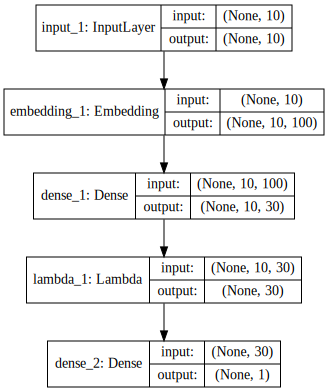

In [8]:
# model
model = get_deepset_model(max_train_length)

# visualize
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
# train
checkpointer = ModelCheckpoint(filepath='/tmp/weights.hdf5', verbose=0, save_best_only=True)

model.fit(X, sum_X, epochs=10, batch_size=128,
        shuffle=True, validation_split=0.0123456789,
        callbacks=[checkpointer])

model = load_model('/tmp/weights.hdf5')

# save weights
deep_we = []
for i in [1,2,4]:
    w = model.get_layer(index=i).get_weights()
    deep_we.append(w)

Train on 98765 samples, validate on 1235 samples
Epoch 1/10
98765/98765 [==============================] - 5s 53us/step - loss: 13.2668 - val_loss: 3.5917
Epoch 2/10
98765/98765 [==============================] - 4s 37us/step - loss: 1.2704 - val_loss: 0.0221
Epoch 3/10
98765/98765 [==============================] - 4s 38us/step - loss: 0.0132 - val_loss: 0.0174
Epoch 4/10
98765/98765 [==============================] - 4s 38us/step - loss: 0.0100 - val_loss: 0.0076
Epoch 5/10
98765/98765 [==============================] - 4s 39us/step - loss: 0.0072 - val_loss: 0.0064
Epoch 6/10
98765/98765 [==============================] - 4s 38us/step - loss: 0.0087 - val_loss: 0.0026
Epoch 7/10
98765/98765 [==============================] - 4s 38us/step - loss: 0.0070 - val_loss: 0.0062
Epoch 8/10
98765/98765 [==============================] - 4s 36us/step - loss: 0.0076 - val_loss: 0.0032
Epoch 9/10
98765/98765 [==============================] - 4s 36us/step - loss: 0.0085 - val_loss: 0.0062
Epoch

# Train LSTM model

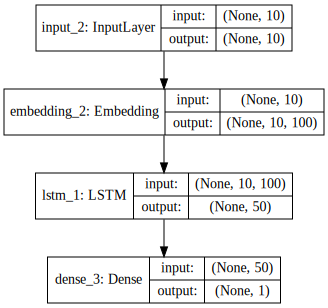

In [10]:
# model
model = get_lstm_model(max_train_length)

# visualize
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [11]:
# train
checkpointer = ModelCheckpoint(filepath='/tmp/weights1.hdf5', verbose=0, save_best_only=True)

model.fit(X, sum_X, epochs=50, batch_size=128,
        shuffle=True, validation_split=0.0123456789,
        callbacks=[checkpointer])

model = load_model('/tmp/weights1.hdf5')

# save weights
lstm_we = []
for i in [1,2,3]:
    w = model.get_layer(index=i).get_weights()
    lstm_we.append(w)

Train on 98765 samples, validate on 1235 samples
Epoch 1/50
98765/98765 [==============================] - 40s 401us/step - loss: 18.3148 - val_loss: 13.8617
Epoch 2/50
98765/98765 [==============================] - 39s 392us/step - loss: 12.3287 - val_loss: 10.8388
Epoch 3/50
98765/98765 [==============================] - 37s 377us/step - loss: 9.5682 - val_loss: 8.3277
Epoch 4/50
98765/98765 [==============================] - 37s 372us/step - loss: 7.3940 - val_loss: 6.4521
Epoch 5/50
98765/98765 [==============================] - 36s 362us/step - loss: 5.6868 - val_loss: 4.9131
Epoch 6/50
98765/98765 [==============================] - 35s 358us/step - loss: 4.2821 - val_loss: 3.6533
Epoch 7/50
98765/98765 [==============================] - 35s 350us/step - loss: 3.1687 - val_loss: 2.6710
Epoch 8/50
98765/98765 [==============================] - 35s 357us/step - loss: 2.3078 - val_loss: 1.9381
Epoch 9/50
98765/98765 [==============================] - 36s 364us/step - loss: 1.6593 - v

# Train GRU model

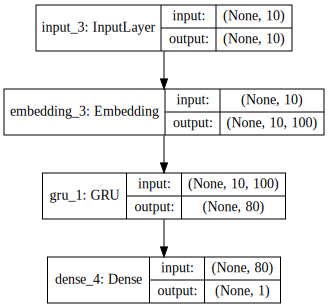

In [12]:
# model
model = get_gru_model(max_train_length)

# visualize
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [13]:
# train
checkpointer = ModelCheckpoint(filepath='/tmp/weights2.hdf5', verbose=0, save_best_only=True)

model.fit(X, sum_X, epochs=50, batch_size=128,
        shuffle=True, validation_split=0.0123456789,
        callbacks=[checkpointer])

model = load_model('/tmp/weights2.hdf5')

# save weights
gru_we = []
for i in [1,2,3]:
    w = model.get_layer(index=i).get_weights()
    gru_we.append(w)

Train on 98765 samples, validate on 1235 samples
Epoch 1/50
98765/98765 [==============================] - 31s 315us/step - loss: 15.2006 - val_loss: 10.3394
Epoch 2/50
98765/98765 [==============================] - 32s 324us/step - loss: 8.5054 - val_loss: 6.9047
Epoch 3/50
98765/98765 [==============================] - 31s 316us/step - loss: 5.6387 - val_loss: 4.3940
Epoch 4/50
98765/98765 [==============================] - 31s 317us/step - loss: 3.5458 - val_loss: 2.7446
Epoch 5/50
98765/98765 [==============================] - 32s 321us/step - loss: 2.2071 - val_loss: 1.7123
Epoch 6/50
98765/98765 [==============================] - 31s 311us/step - loss: 0.8277 - val_loss: 0.6644
Epoch 8/50
98765/98765 [==============================] - 30s 301us/step - loss: 0.5422 - val_loss: 0.4525
Epoch 9/50
98765/98765 [==============================] - 31s 314us/step - loss: 0.3774 - val_loss: 0.3222
Epoch 10/50
98765/98765 [==============================] - 31s 310us/step - loss: 0.2798 - va

# Evaluate models

In [14]:
metrics = {'deepsets': {'acc':[], 'mae':[], 'mse':[]}, 'lstm': {'acc':[], 'mae':[], 'mse':[]}, 'gru': {'acc':[], 'mae':[], 'mse':[]}}

lengths = range(min_test_length, max_test_length, step_test_length)
for l in lengths:
    print('Evaluating at length: ', l)
    K.clear_session()
    
    # generate test data
    Y, sum_Y = gen_test_data(num_test_examples, l)

    # model
    model = get_deepset_model(l)

    # load weights
    for i, idx in enumerate([1,2,4]):
        model.get_layer(index=idx).set_weights(deep_we[i])

    # prediction
    preds = model.predict(Y, batch_size=128, verbose=1)
    metrics['deepsets']['acc'].append(1.0*np.sum(np.squeeze(np.round(preds))==sum_Y)/len(sum_Y))
    metrics['deepsets']['mae'].append(np.sum(np.abs(np.squeeze(preds)-sum_Y))/len(sum_Y))
    metrics['deepsets']['mse'].append(np.dot(np.squeeze(preds)-sum_Y, np.squeeze(preds)-sum_Y)/len(sum_Y))
    
    # model
    model = get_lstm_model(l)

    # load weights
    for i, idx in enumerate([1,2,3]):
        model.get_layer(index=idx).set_weights(lstm_we[i])

    # prediction
    preds = model.predict(Y, batch_size=128, verbose=1)
    metrics['lstm']['acc'].append(1.0*np.sum(np.squeeze(np.round(preds))==sum_Y)/len(sum_Y))
    metrics['lstm']['mae'].append(np.sum(np.abs(np.squeeze(preds)-sum_Y))/len(sum_Y))
    metrics['lstm']['mse'].append(np.dot(np.squeeze(preds)-sum_Y, np.squeeze(preds)-sum_Y)/len(sum_Y))
    
    # model
    model = get_gru_model(l)

    # load weights
    for i, idx in enumerate([1,2,3]):
        model.get_layer(index=idx).set_weights(gru_we[i])

    # prediction
    preds = model.predict(Y, batch_size=128, verbose=1)
    metrics['gru']['acc'].append(1.0*np.sum(np.squeeze(np.round(preds))==sum_Y)/len(sum_Y))
    metrics['gru']['mae'].append(np.sum(np.abs(np.squeeze(preds)-sum_Y))/len(sum_Y))
    metrics['gru']['mse'].append(np.dot(np.squeeze(preds)-sum_Y, np.squeeze(preds)-sum_Y)/len(sum_Y))

Evaluating at length:  5
10000/10000 [==============================] - 0s 43us/step
Evaluating at length:  10
10000/10000 [==============================] - 1s 70us/step
Evaluating at length:  15
10000/10000 [==============================] - 1s 92us/step
Evaluating at length:  20
10000/10000 [==============================] - 1s 137us/step
Evaluating at length:  25
10000/10000 [==============================] - 2s 160us/step
Evaluating at length:  30
10000/10000 [==============================] - 2s 191us/step
Evaluating at length:  35
10000/10000 [==============================] - 2s 211us/step
Evaluating at length:  40
10000/10000 [==============================] - 2s 241us/step
Evaluating at length:  45
10000/10000 [==============================] - 3s 283us/step
Evaluating at length:  50
10000/10000 [==============================] - 4s 361us/step
Evaluating at length:  55
10000/10000 [==============================] - 4s 394us/step
Evaluating at length:  60
10000/10000 [========

Compare the performance

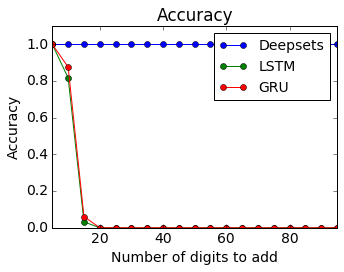

In [15]:
font = {'size': 14}
matplotlib.rc('font', **font)

scale = 0.5
plt.figure(figsize=(10*scale, 8*scale))

plt.plot(lengths, metrics['deepsets']['acc'], 'o-')
plt.plot(lengths, metrics['lstm']['acc'], 'o-')
plt.plot(lengths, metrics['gru']['acc'], 'o-')
plt.xlabel('Number of digits to add')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.ylim( 0, 1.1 )
plt.xlim( 5, 95 )
plt.legend(['Deepsets', 'LSTM', 'GRU'], fontsize=14)
plt.tight_layout()
plt.show()

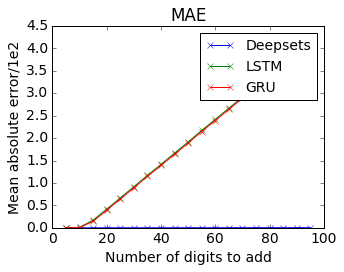

In [16]:
font = {'size': 14}
matplotlib.rc('font', **font)

scale = 0.5
plt.figure(figsize=(10*scale, 8*scale))

plt.plot(lengths, np.array(metrics['deepsets']['mae'])/1e2, 'x-')
plt.plot(lengths, np.array(metrics['lstm']['mae'])/1e2, 'x-')
plt.plot(lengths, np.array(metrics['gru']['mae'])/1e2, 'x-')
plt.xlabel('Number of digits to add')
plt.ylabel('Mean absolute error/1e2')
plt.title('MAE')
plt.legend(['Deepsets', 'LSTM', 'GRU'], fontsize=14)
plt.tight_layout()
plt.show()

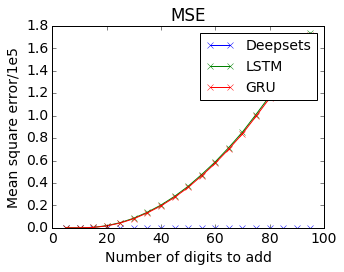

In [17]:
font = {'size': 14}
matplotlib.rc('font', **font)

scale = 0.5
plt.figure(figsize=(10*scale, 8*scale))

plt.plot(lengths, np.array(metrics['deepsets']['mse'])/1e5, 'x-')
plt.plot(lengths, np.array(metrics['lstm']['mse'])/1e5, 'x-')
plt.plot(lengths, np.array(metrics['gru']['mse'])/1e5, 'x-')
plt.xlabel('Number of digits to add')
plt.ylabel('Mean square error/1e5')
plt.title('MSE')
plt.legend(['Deepsets', 'LSTM', 'GRU'], fontsize=14)
plt.tight_layout()
plt.show()